In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
qwen_8b = pd.read_csv("../../qwen3_8b_aod_usa.csv")
qwen_14b = pd.read_csv("../../qwen3_14b_aod_usa.csv")
# qwen_32b = pd.read_csv("qwen3_32b_ndvi.csv")
gemma_9b = pd.read_csv("../../gemma2_9b_aod_usa.csv")
gemma_27b = pd.read_csv("../../gemma_2_27b_it_aod_usa.csv")
# llama_70b = pd.read_csv("llama_70b_ndvi.csv")

In [3]:
qwen_8b_india = pd.read_csv("../../qwen3_8b_aod.csv")
qwen_14b_india = pd.read_csv("../../qwen3_14b_aod_1.csv")
gemma_9b_india = pd.read_csv("../../gemma_9b_aod.csv")
gemma_27b_india = pd.read_csv("../../gemma_27b_aod.csv")

In [23]:
print("# Null values in qwen_8b:", qwen_8b.isnull().sum().sum())
print("# Null values in qwen_14b:", qwen_14b.isnull().sum().sum())
# print("# Null values in qwen_32b:", qwen_32b.isnull().sum().sum())
print("# Null values in gemma_9b:", gemma_9b.isnull().sum().sum())
print("# Null values in gemma_27b:", gemma_27b.isnull().sum().sum())
# print("# Null values in llama_70b:", llama_70b.isnull().sum().sum())

# Null values in qwen_8b: 2
# Null values in qwen_14b: 3
# Null values in gemma_9b: 2522
# Null values in gemma_27b: 0


In [9]:
rows_per_ndvi = 2412

In [10]:
def add_ndvi_column(df):
    ndvi_values = np.linspace(0, 1, 6) # gives 21 values including 0
    # ndvi_values = ndvi_values[ndvi_values != 0] # remove 0 → 20 values, but you said 19? Double check this

    # Repeat NDVI values for the dataset
    # If you have 2412 rows per NDVI, and all models stacked, make sure ordering matches
    df["aod"] = np.repeat(ndvi_values, rows_per_ndvi)
    return df

In [11]:
add_ndvi_column(qwen_8b)
add_ndvi_column(qwen_14b)
# add_ndvi_column(qwen_32b)
add_ndvi_column(gemma_9b)
add_ndvi_column(gemma_27b)
# add_ndvi_column(llama_70b)

ValueError: Length of values (14472) does not match length of index (11982)

In [12]:
add_ndvi_column(qwen_8b_india)
add_ndvi_column(qwen_14b_india)
add_ndvi_column(gemma_9b_india)
add_ndvi_column(gemma_27b_india)

,city,state,year,month,aod,model,pm2.5
0,Agartala,Tripura,2023,January,0.0,google/gemma-2-27b-it,45.0
1,Agartala,Tripura,2023,February,0.0,google/gemma-2-27b-it,45.0
2,Agartala,Tripura,2023,March,0.0,google/gemma-2-27b-it,42.0
3,Agartala,Tripura,2023,April,0.0,google/gemma-2-27b-it,42.0
4,Agartala,Tripura,2023,May,0.0,google/gemma-2-27b-it,42.0
...,...,...,...,...,...,...,...
14467,Yamuna Nagar,Haryana,2023,August,1.0,google/gemma-2-27b-it,45.0
14468,Yamuna Nagar,Haryana,2023,September,1.0,google/gemma-2-27b-it,102.0
14469,Yamuna Nagar,Haryana,2023,October,1.0,google/gemma-2-27b-it,125.0
14470,Yamuna Nagar,Haryana,2023,November,1.0,google/gemma-2-27b-it,125.0



Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:


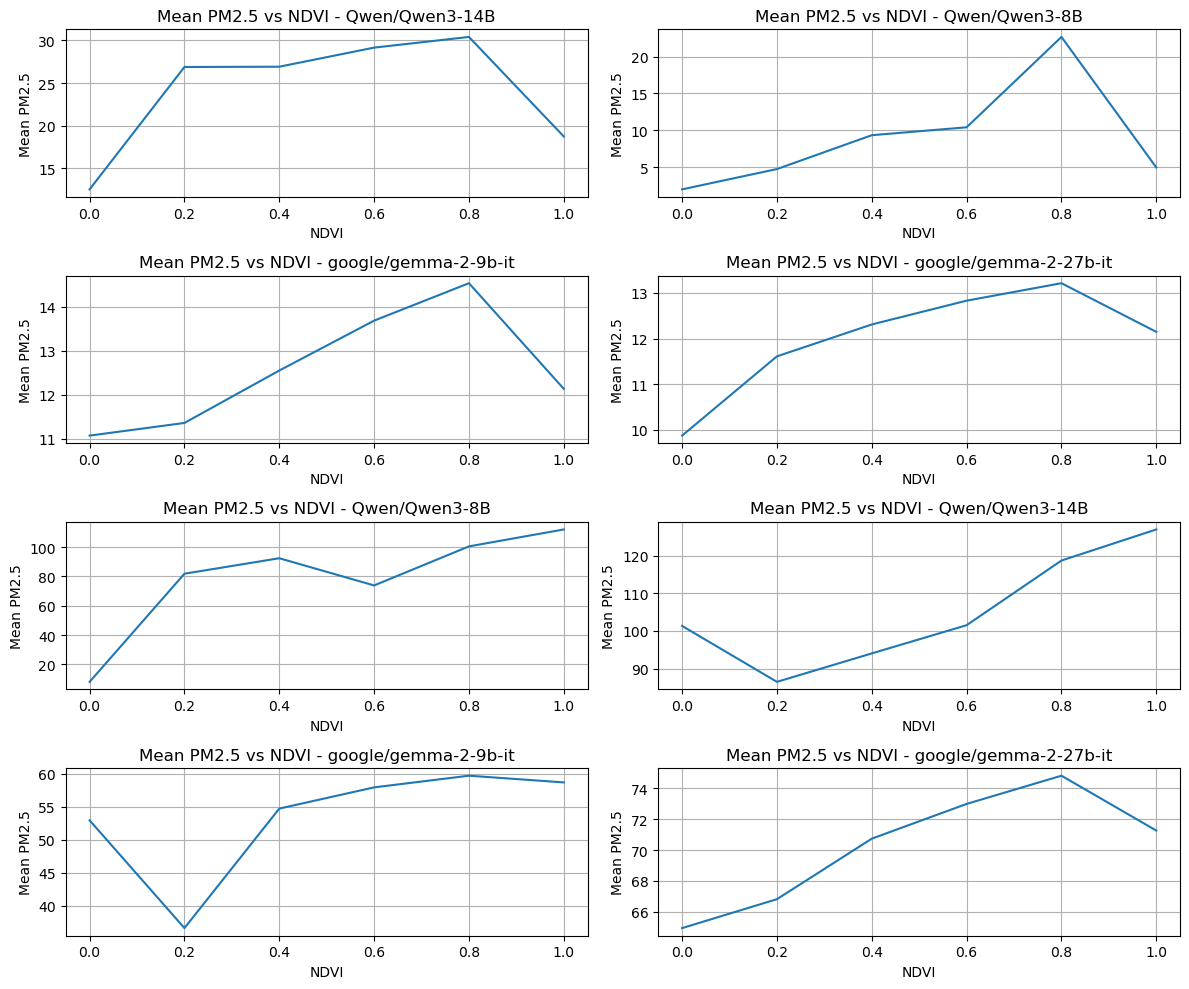

In [24]:
plt.subplots(4, 2, figsize=(12, 10))
count = 1
def get_mean_variance(df):
    df_grouped = df.groupby("aod").agg(
    mean_pm25=("pm2.5", "mean"),
    var_pm25=("pm2.5", "var")
    ).reset_index()

    global count
    print("\nMean & Variance per NDVI bin:")
    # print(df_grouped)
    model_name = df['model'].iloc[0]
    plt.subplot(4, 2, count)
    plt.plot(df_grouped["aod"], df_grouped["mean_pm25"])
    plt.title(f"Mean PM2.5 vs NDVI - {model_name}")
    plt.xlabel("NDVI")
    plt.ylabel("Mean PM2.5")
    plt.tight_layout()
    plt.grid()
    count += 1
    return df_grouped
qwen_14b_stats = get_mean_variance(qwen_14b)
# qwen_32b_stats = get_mean_variance(qwen_32b)
qwen_8b_stats = get_mean_variance(qwen_8b)
gemma_9b_stats = get_mean_variance(gemma_9b)
gemma_27b_stats = get_mean_variance(gemma_27b)

qwen_8b_india_stats = get_mean_variance(qwen_8b_india)
qwen_14b_india_stats = get_mean_variance(qwen_14b_india)
gemma_9b_india_stats = get_mean_variance(gemma_9b_india)
gemma_27b_india_stats = get_mean_variance(gemma_27b_india)
plt.show()

In [15]:
qwen_8b.dropna(inplace=True)
qwen_14b.dropna(inplace=True)
# qwen_32b.dropna(inplace=True)
gemma_9b.dropna(inplace=True)
gemma_27b.dropna(inplace=True)

In [16]:
qwen_8b_india.dropna(inplace=True)
qwen_14b_india.dropna(inplace=True)
gemma_9b_india.dropna(inplace=True)
gemma_27b_india.dropna(inplace=True)

In [17]:
def get_pearson_spearman(df):
    pear, _ = pearsonr(df["aod"], df["pm2.5"])
    spear, _ = spearmanr(df["aod"], df["pm2.5"])
    print(f"\nPearson correlation: {pear:.4f}")
    print(f"Spearman correlation: {spear:.4f}")

In [18]:
mean_qwen14 = get_pearson_spearman(qwen_14b)
# mean_qwen32 = get_pearson_spearman(qwen_32b)
mean_qwen8 = get_pearson_spearman(qwen_8b)
mean_gemma9 = get_pearson_spearman(gemma_9b)
mean_gemma27 = get_pearson_spearman(gemma_27b)


Pearson correlation: 0.1568
Spearman correlation: 0.2102

Pearson correlation: 0.1257
Spearman correlation: 0.1549

Pearson correlation: 0.2772
Spearman correlation: 0.2425

Pearson correlation: 0.2376
Spearman correlation: 0.3804


In [19]:
aod_arr =[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [20]:
pear_qwen_14 = np.corrcoef(qwen_14b_stats['mean_pm25'], aod_arr)
# pear_qwen_32 = np.corrcoef(qwen_32b_stats['mean_pm25'], aod_arr)
pear_qwen_8 = np.corrcoef(qwen_8b_stats['mean_pm25'], aod_arr)
pear_gemma_9 = np.corrcoef(gemma_9b_stats['mean_pm25'], aod_arr)
pear_gemma_27 = np.corrcoef(gemma_27b_stats['mean_pm25'], aod_arr)


print("Pearson (mean per NDVI) - Qwen 14B:", pear_qwen_14[0,1])
# print("Pearson (mean per NDVI) - Qwen 32B:", pear_qwen_32[0,1])
print("Pearson (mean per NDVI) - Qwen 8B:", pear_qwen_8[0,1])
print("Pearson (mean per NDVI) - Gemma 9B:", pear_gemma_9[0,1])
print("Pearson (mean per NDVI) - Gemma 27B:", pear_gemma_27[0,1])

Pearson (mean per NDVI) - Qwen 14B: 0.33550245763582276
Pearson (mean per NDVI) - Qwen 8B: 0.5045061065124189
Pearson (mean per NDVI) - Gemma 9B: 0.6362918691951933
Pearson (mean per NDVI) - Gemma 27B: 0.7569096093552468


In [26]:
pear_qwen_14_india = np.corrcoef(qwen_14b_india_stats['mean_pm25'], aod_arr)
# pear_qwen_32 = np.corrcoef(qwen_32b_stats['mean_pm25'], aod_arr)
pear_qwen_8_india = np.corrcoef(qwen_8b_india_stats['mean_pm25'], aod_arr)
pear_gemma_9_india = np.corrcoef(gemma_9b_india_stats['mean_pm25'], aod_arr)
pear_gemma_27_india = np.corrcoef(gemma_27b_india_stats['mean_pm25'], aod_arr)


print("Pearson (mean per NDVI) - Qwen 14B:", pear_qwen_14_india[0,1])
# print("Pearson (mean per NDVI) - Qwen 32B:", pear_qwen_32[0,1])
print("Pearson (mean per NDVI) - Qwen 8B:", pear_qwen_8_india[0,1])
print("Pearson (mean per NDVI) - Gemma 9B:", pear_gemma_9_india[0,1])
print("Pearson (mean per NDVI) - Gemma 27B:", pear_gemma_27_india[0,1])

Pearson (mean per NDVI) - Qwen 14B: 0.8157558914760381
Pearson (mean per NDVI) - Qwen 8B: 0.8080177203724459
Pearson (mean per NDVI) - Gemma 9B: 0.6271449213142901
Pearson (mean per NDVI) - Gemma 27B: 0.8289505483116352


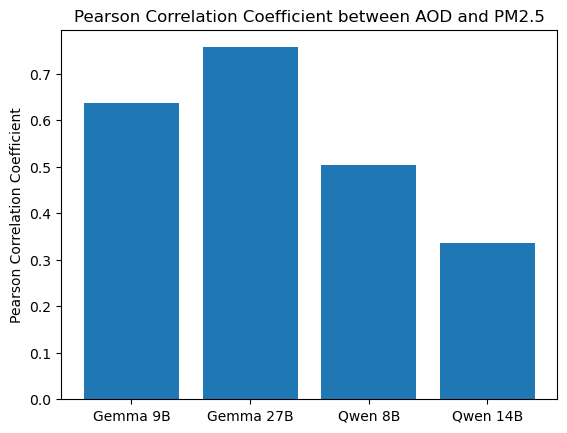

In [ ]:
plt.style.use("ggplot") 
plt.bar([0, 1, 2, 3],[pear_gemma_9[0,1], pear_gemma_27[0,1], pear_qwen_8[0, 1], pear_qwen_14[0, 1]], )
plt.bar([0, 1, 2, 3],[pear_gemma_9_india[0,1], pear_gemma_27_india[0,1], pear_qwen_8_india[0, 1], pear_qwen_14_india[0, 1]], c)
plt.xticks([0, 1, 2, 3], ['Gemma 9B', 'Gemma 27B', 'Qwen 8B', 'Qwen 14B'])
plt.ylabel("Pearson Correlation Coefficient")
plt.title("Pearson Correlation Coefficient between AOD and PM2.5")
plt.show()

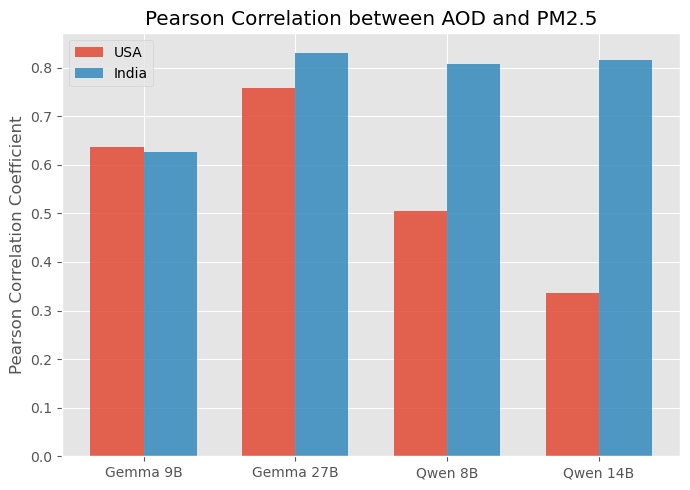

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

# X positions
x = np.arange(4)
width = 0.35   # bar width

# Your data
usa_vals = [
    pear_gemma_9[0,1],
    pear_gemma_27[0,1],
    pear_qwen_8[0,1],
    pear_qwen_14[0,1]
]

india_vals = [
    pear_gemma_9_india[0,1],
    pear_gemma_27_india[0,1],
    pear_qwen_8_india[0,1],
    pear_qwen_14_india[0,1]
]

labels = ['Gemma 9B', 'Gemma 27B', 'Qwen 8B', 'Qwen 14B']

# ----------- PLOTTING -----------
plt.figure(figsize=(7,5))

plt.bar(x - width/2, usa_vals, width, label="USA", alpha=0.85)
plt.bar(x + width/2, india_vals, width, label="India", alpha=0.85)

plt.xticks(x, labels)
plt.ylabel("Pearson Correlation Coefficient")
plt.title("Pearson Correlation between AOD and PM2.5")
plt.legend()

plt.tight_layout()
plt.show()
